# Numpy
Es un módulo que nos ayudará a trabajar con arrays, que son como las listas, pero más rápidas de procesar.

In [1]:
import numpy as np

## crear un array apartir de una lista

In [2]:
a = np.array([1,2,3,4])
print(a) 

[1 2 3 4]


In [3]:
type(a)

numpy.ndarray

<div class="alert alert-block alert-danger">
<b>Advertencia:</b> Al imprimir en pantalla las listas están separadas por coma y los array solo por espacios. Tener cuidado al momento de usarlas indiscriminadamente porque no comparten los mismos métodos para procesar datos
</div>

## Crear un array apartir de una tupla

In [4]:
b = np.array((1,2,3))
print(b)

[1 2 3]


In [5]:
type(b)

numpy.ndarray

## Dimensiones de un array

In [6]:
unidimensional = np.array([1,2,3,4,5])
unidimensional

array([1, 2, 3, 4, 5])

In [7]:
unidimensional.ndim

1

In [8]:
bidimensional = np.array([[1,2,3], [4,5,6]])
bidimensional

array([[1, 2, 3],
       [4, 5, 6]])

In [9]:
bidimensional.ndim

2

In [10]:
tridimensional = np.array([[[1,2,3],
                            [4,5,6]], 
                           
                           [[1,2,3],
                            [4,5,6]]])
tridimensional

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [11]:
tridimensional.ndim

3

## Acceder a los elementos de un array

In [12]:
unidimensional

array([1, 2, 3, 4, 5])

In [13]:
unidimensional[2]

3

In [14]:
bidimensional

array([[1, 2, 3],
       [4, 5, 6]])

In [15]:
bidimensional[0][2], bidimensional[0,2]

(3, 3)

In [16]:
tridimensional

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [17]:
tridimensional[1][0][2], tridimensional[1,0,2]

(3, 3)

## filtrar arrays 

In [18]:
tridimensional 

array([[[1, 2, 3],
        [4, 5, 6]],

       [[1, 2, 3],
        [4, 5, 6]]])

In [19]:
a = tridimensional[tridimensional%2 == 0]
a

array([2, 4, 6, 2, 4, 6])

## shape: número de elemenso de cada dimension

In [20]:
unidimensional.shape

(5,)

In [21]:
bidimensional.shape

(2, 3)

In [22]:
tridimensional.shape

(2, 2, 3)

## Operaciones

In [23]:
a = np.array([2,4,5,1])
b = np.array([1,3,2,5])

In [24]:
a + b

array([3, 7, 7, 6])

In [25]:
a - b

array([ 1,  1,  3, -4])

In [26]:
a*b

array([ 2, 12, 10,  5])

In [27]:
a/b

array([2.        , 1.33333333, 2.5       , 0.2       ])

In [28]:
np.mod(a,b)

array([0, 1, 1, 1], dtype=int32)

## Ejemplito 


Realizar una función que tenga como salida la probabilidad ($P_i$) y como parámetros $x$ y $\beta$ 

$$
P_i = P(x_i) = \frac{1}{1+e^{-\displaystyle\sum_{j=0}^{k}\beta_j \cdot x_{ij}}}
$$

La probabilidad que estamos calculando es la probabilidad para cada observación dentro deun registro (i : filas) 

Partiremos del siguiente dataframe, para evaluar posteriormente

|x_1|x_2|
|-|-|
|1|5|
|1|4|
|5|1|

y $\beta = \begin{bmatrix} 
	5  \\
	4  \\
	\end{bmatrix}$

Entonces Para $P_0$ tendríamos lo siguiente:
$x_{0j} = \begin{bmatrix} 
	1 & 5 \\
	\end{bmatrix}$
$$
P_0 = P(x_0) = \frac{1}{1+e^{-\displaystyle\sum^{1}_{j=0}\beta_j \cdot x_{0j} }}\\
P_0 = \displaystyle\frac{1}{1+e^{-1(\beta_0 \cdot x_{00} + \beta_1 \cdot x_{01}) } } = \displaystyle\frac{1}{1+e^{-(5*1 + 4*5)} }\\
P_0 = \frac{1}{1+e^{-25}} = 0.999999999986112
$$

Entonces Para $P_1$ tendríamos lo siguiente:
$x_{1j} = \begin{bmatrix} 
	1 & 4 \\
	\end{bmatrix}$
$$
P_1 = P(x_1) = \frac{1}{1+e^{-\displaystyle\sum^{1}_{j=0}\beta_j \cdot x_{0j} }}\\
P_1 = \displaystyle\frac{1}{1+e^{-1(\beta_0 \cdot x_{10} + \beta_1 \cdot x_{11}) } } = \displaystyle\frac{1}{1+e^{-(5*1 + 4*4)} }\\
P_1 = \frac{1}{1+e^{-21}} = 0.9999999992417439
$$

Entonces Para $P_2$ tendríamos lo siguiente:
$x_{2j} = \begin{bmatrix} 
	5 & 1 \\
	\end{bmatrix}$
$$
P_2 = P(x_2) = \frac{1}{1+e^{-\displaystyle\sum^{1}_{j=0}\beta_j \cdot x_{0j} }}\\
P_2 = \displaystyle\frac{1}{1+e^{-1(\beta_0 \cdot x_{10} + \beta_1 \cdot x_{11}) } } = \displaystyle\frac{1}{1+e^{-(5*5 + 4*1)} }\\
P_2 = \frac{1}{1+e^{-29}} = 0.9999999999997455
$$

In [29]:
def probabilidad(X, beta):
    import numpy as np #está disponible dentro de esta función, fuera no se sabe
    n_filas = np.shape(X)[0] # de filas de X
    n_columnas = np.shape(X)[1] # de columnas de X
    pi = list(range(1, n_filas+1)) # [1,2,3,4, ...., #columnas] Recordemos que el +1 es porque la función range es [> (abierto en la derecha)
    expon = list(range(1,n_filas+1)) #[1,2,3,4,..., #columnas]
    for i in range(n_filas):
        expon[i] = 0 #como la sumatoria comienza de cero, entonces inicializamos el acumulador 
        for j in range(n_columnas):
            ex = X[i][j] * beta[j]
            expon[i] = ex +expon[i]
        with np.errstate(divide="ignore", invalid="ignore"): # si sale una división imposible  entonces que lo ignore.
            pi[i]=1/(1+np.exp(-expon[i])) #fórmula de  pi resumida, que iterará cada i y j para hallar el Pi final.
    return pi

In [30]:
probabilidad(np.array([[1,5],
                     [1,4],
                     [5,1]]), np.array([5,4]))

[0.999999999986112, 0.9999999992417439, 0.9999999999997455]

# Dataframes
**Dataframe:** Es una estructura bidireccional donde las columnas son variables y las filas son registros u observaciones

In [31]:
# Librería para la manipulación de dataframes
import pandas as pd 

## Convertir de diccionario a dataframes

- Tener en cuenta que las ``claves`` son las ``columnas`` del dataframe
- Los ``valores`` son los registros o ``filas`` 

In [32]:
diccionario = {'variable_1': [20,30,40,10,50],
               'variable_2': [2,4,5,6,7]}
df_1 = pd.DataFrame(diccionario)
df_1

,variable_1,variable_2
0,20,2
1,30,4
2,40,5
3,10,6
4,50,7


<div class="alert alert-block alert-warning">
    <b>Nota:</b> Por defecto, al momento de crear un dataframe se genera la indexación que comienza desde 0
</div>

## Convertir de lista a dataframes

In [33]:
nombre_columnas = ['ID', 'Precio','Cantidad']
lista = [['XC01', 20000, 3],
         ['XC02',30000, 2],
         ['XC03',10000, 4]]

In [34]:
df_2 = pd.DataFrame(data = lista, 
                 columns= nombre_columnas,
                 index = ['Propiedad '+str(x+1) for x in range(len(lista))])
df_2

,ID,Precio,Cantidad
Propiedad 1,XC01,20000,3
Propiedad 2,XC02,30000,2
Propiedad 3,XC03,10000,4


### Usar la función zip () 

In [35]:
nombre_columnas = ['ID', 'Precio','Cantidad']
variable_1 = ['XC01', 'XC02', 'XC03']
variable_2 = [20000, 30000, 10000]
variable_3 = [3,2,4]

lista_completa = list(zip(variable_1, variable_2, variable_3))
lista_completa  

[('XC01', 20000, 3), ('XC02', 30000, 2), ('XC03', 10000, 4)]

In [36]:
df_zip = pd.DataFrame(data = lista_completa, columns= nombre_columnas)
df_zip

,ID,Precio,Cantidad
0,XC01,20000,3
1,XC02,30000,2
2,XC03,10000,4


## Modificar la indexación

In [37]:
df_1 

,variable_1,variable_2
0,20,2
1,30,4
2,40,5
3,10,6
4,50,7


In [38]:
df_1.index = ['Propiedad '+str(x+1) for x in range(df_1.shape[0]) ]

In [39]:
df_1

,variable_1,variable_2
Propiedad 1,20,2
Propiedad 2,30,4
Propiedad 3,40,5
Propiedad 4,10,6
Propiedad 5,50,7


## Manipulación de columnas
Podemos manipular de diversas formas:
* Mencionando el nombre de la columna ``df['nombre_columna']``
* Usando el método ``.columns[]``
* Usando el método ``.loc[]`` $\longrightarrow$ cuando llamamos por nombre o etiqueta
* Usnado el método ``.iloc[]``$\longrightarrow$ cuando llamamos por su posición

In [40]:
import pandas as pd

df = pd.read_csv('data/diabetes.csv')
df.head() #usamos para visualizar las primera 5 filas

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [41]:
df[['Age']] #Seleccionamos toda la columna 'Age'

,Age
0,50
1,31
2,32
3,21
4,33
...,...
763,63
764,27
765,30
766,47


### Uso de columns

In [42]:
df.columns[2] # Hacemos el llamado del nombre de la columna con indexación 2

'BloodPressure'

In [43]:
df[df.columns[[0,1,2]]]

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40
...,...,...,...
763,10,101,76
764,2,122,70
765,5,121,72
766,1,126,60


### Uso de Loc

El método ``.loc`` tiene la siguiente sintaxis:

``
df.loc[rango de filas, rango de columnas (nombres)]
``

In [44]:
df.loc[:,['Age']]

,Age
0,50
1,31
2,32
3,21
4,33
...,...
763,63
764,27
765,30
766,47


In [45]:
df.loc[:,['Age','BMI']]

,Age,BMI
0,50,33.6
1,31,26.6
2,32,23.3
3,21,28.1
4,33,43.1
...,...,...
763,63,32.9
764,27,36.8
765,30,26.2
766,47,30.1


In [46]:
df.loc[1:5,['Age','BMI']]

,Age,BMI
1,31,26.6
2,32,23.3
3,21,28.1
4,33,43.1
5,30,25.6


In [47]:
df.loc[1:2,:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [48]:
df.loc[[20],:]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
20,3,126,88,41,235,39.3,0.704,27,0


In [49]:
df.loc[[20],['Age','BMI']]

,Age,BMI
20,27,39.3


### Uso de Iloc

In [50]:
df.iloc[:,[7]]

,Age
0,50
1,31
2,32
3,21
4,33
...,...
763,63
764,27
765,30
766,47


In [51]:
df.iloc[:,[7,8]]

,Age,Outcome
0,50,1
1,31,0
2,32,1
3,21,0
4,33,1
...,...,...
763,63,0
764,27,0
765,30,0
766,47,1


In [52]:
df.iloc[1:5,[7,8]]

,Age,Outcome
1,31,0
2,32,1
3,21,0
4,33,1


In [53]:
df.iloc[[20],[7,8]]

,Age,Outcome
20,27,0


<div class="alert alert-block alert-info">
    <b>zip:</b> Usamos zip para poder enumerar las columnas de un dataframe 
</div>

In [54]:
list(zip(df.index,df.columns))

[(0, 'Pregnancies'),
 (1, 'Glucose'),
 (2, 'BloodPressure'),
 (3, 'SkinThickness'),
 (4, 'Insulin'),
 (5, 'BMI'),
 (6, 'DiabetesPedigreeFunction'),
 (7, 'Age'),
 (8, 'Outcome')]

## Manipulación de filas
Podemos manipular de diversas formas:
* Usando el método ``.loc[]`` $\longrightarrow$ cuando llamamos por nombre o etiqueta
* Usnado el método ``.iloc[]``$\longrightarrow$ cuando llamamos por su posición

In [55]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [56]:
df.index = ['Propiedad '+ str(x) for x in range(df.shape[0])]

### Uso de Loc

In [57]:
df.loc[['Propiedad 763'],:] #mostramos la fila con indexación 763

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Propiedad 763,10,101,76,48,180,32.9,0.171,63,0


### Uso de Iloc

In [58]:
df.iloc[[763]] #mostramos la última fila

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Propiedad 763,10,101,76,48,180,32.9,0.171,63,0


## Extraer elemento

In [59]:
df.loc['Propiedad 763', 'Glucose']

101

In [60]:
df.iloc[763,1]

101

In [61]:
df.loc[['Propiedad 762'],['Glucose']]

,Glucose
Propiedad 762,89


## Métodos en dataframes

### shape: Tamaño de un dataframe 

In [62]:
df_1

,variable_1,variable_2
Propiedad 1,20,2
Propiedad 2,30,4
Propiedad 3,40,5
Propiedad 4,10,6
Propiedad 5,50,7


El método ``.shape`` genera una tupla ``(# filas, # columnas)`` que tiene un dataframe

In [63]:
df_1.shape

(5, 2)

In [64]:
filas = df_1.shape[0] # número de filas
columnas = df_1.shape[1] # número de columnas
print('El número de filas es: {} \nEl número de columnas es: {}'.format(filas, columnas))

El número de filas es: 5 
El número de columnas es: 2


In [65]:
df_1.size # método para saber cuántos datos tiene la tabla(dataframe)

10

### copy: Duplicar un dataframe

<div class="alert alert-block alert-danger">
<b>Advertencia:</b> Evitar asignar un dataframe a una variable, ya que modificar la nueva variable implicaría modificar el dataframe original
</div>

In [66]:
df_copia = df.copy()

In [67]:
df_copia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Propiedad 0,6,148,72,35,0,33.6,0.627,50,1
Propiedad 1,1,85,66,29,0,26.6,0.351,31,0
Propiedad 2,8,183,64,0,0,23.3,0.672,32,1
Propiedad 3,1,89,66,23,94,28.1,0.167,21,0
Propiedad 4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
Propiedad 763,10,101,76,48,180,32.9,0.171,63,0
Propiedad 764,2,122,70,27,0,36.8,0.340,27,0
Propiedad 765,5,121,72,23,112,26.2,0.245,30,0
Propiedad 766,1,126,60,0,0,30.1,0.349,47,1


### rename (columns = ): Renombrar columnas

In [68]:
df_copia.rename(columns= {'Glucose': 'Glucosa',
                         'BMI': 'IMC',
                         'Age': 'Edad',
                         'Outcome': 'Target',
                         'DiabetesPedigreeFunction': 'Beta'},
                inplace = True)
df_copia

,Pregnancies,Glucosa,BloodPressure,SkinThickness,Insulin,IMC,Beta,Edad,Target
Propiedad 0,6,148,72,35,0,33.6,0.627,50,1
Propiedad 1,1,85,66,29,0,26.6,0.351,31,0
Propiedad 2,8,183,64,0,0,23.3,0.672,32,1
Propiedad 3,1,89,66,23,94,28.1,0.167,21,0
Propiedad 4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
Propiedad 763,10,101,76,48,180,32.9,0.171,63,0
Propiedad 764,2,122,70,27,0,36.8,0.340,27,0
Propiedad 765,5,121,72,23,112,26.2,0.245,30,0
Propiedad 766,1,126,60,0,0,30.1,0.349,47,1


### rename(index = ): renombrar indexación

In [69]:
df_copia.rename(index = {'Propiedad 0': 'Laura Ramirez'}, inplace = True)
df_copia

,Pregnancies,Glucosa,BloodPressure,SkinThickness,Insulin,IMC,Beta,Edad,Target
Laura Ramirez,6,148,72,35,0,33.6,0.627,50,1
Propiedad 1,1,85,66,29,0,26.6,0.351,31,0
Propiedad 2,8,183,64,0,0,23.3,0.672,32,1
Propiedad 3,1,89,66,23,94,28.1,0.167,21,0
Propiedad 4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
Propiedad 763,10,101,76,48,180,32.9,0.171,63,0
Propiedad 764,2,122,70,27,0,36.8,0.340,27,0
Propiedad 765,5,121,72,23,112,26.2,0.245,30,0
Propiedad 766,1,126,60,0,0,30.1,0.349,47,1


### columns

In [70]:
df_copia.columns  = ['Embarazo', 'Glucosa', 'Presión', 'Grosor_piel', 'Insulina', 'IMC', 'Beta', 'Edad','Target']

In [71]:
df_copia

,Embarazo,Glucosa,Presión,Grosor_piel,Insulina,IMC,Beta,Edad,Target
Laura Ramirez,6,148,72,35,0,33.6,0.627,50,1
Propiedad 1,1,85,66,29,0,26.6,0.351,31,0
Propiedad 2,8,183,64,0,0,23.3,0.672,32,1
Propiedad 3,1,89,66,23,94,28.1,0.167,21,0
Propiedad 4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
Propiedad 763,10,101,76,48,180,32.9,0.171,63,0
Propiedad 764,2,122,70,27,0,36.8,0.340,27,0
Propiedad 765,5,121,72,23,112,26.2,0.245,30,0
Propiedad 766,1,126,60,0,0,30.1,0.349,47,1


### drop(labels = [ ] , axis = 1): Eliminar columnas

In [72]:
df_copia.drop(labels = ['Embarazo','Presión'], axis = 1, inplace= True)
df_copia

,Glucosa,Grosor_piel,Insulina,IMC,Beta,Edad,Target
Laura Ramirez,148,35,0,33.6,0.627,50,1
Propiedad 1,85,29,0,26.6,0.351,31,0
Propiedad 2,183,0,0,23.3,0.672,32,1
Propiedad 3,89,23,94,28.1,0.167,21,0
Propiedad 4,137,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
Propiedad 763,101,48,180,32.9,0.171,63,0
Propiedad 764,122,27,0,36.8,0.340,27,0
Propiedad 765,121,23,112,26.2,0.245,30,0
Propiedad 766,126,0,0,30.1,0.349,47,1


### drop(labels = [ ] , axis = 0): Eliminar filas

In [73]:
df_copia.drop(labels = ['Laura Ramirez', 'Propiedad 4'], axis = 0, inplace = True)
df_copia

,Glucosa,Grosor_piel,Insulina,IMC,Beta,Edad,Target
Propiedad 1,85,29,0,26.6,0.351,31,0
Propiedad 2,183,0,0,23.3,0.672,32,1
Propiedad 3,89,23,94,28.1,0.167,21,0
Propiedad 5,116,0,0,25.6,0.201,30,0
Propiedad 6,78,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...
Propiedad 763,101,48,180,32.9,0.171,63,0
Propiedad 764,122,27,0,36.8,0.340,27,0
Propiedad 765,121,23,112,26.2,0.245,30,0
Propiedad 766,126,0,0,30.1,0.349,47,1


### unique and value_counts

In [74]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Propiedad 0,6,148,72,35,0,33.6,0.627,50,1
Propiedad 1,1,85,66,29,0,26.6,0.351,31,0
Propiedad 2,8,183,64,0,0,23.3,0.672,32,1
Propiedad 3,1,89,66,23,94,28.1,0.167,21,0
Propiedad 4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
Propiedad 763,10,101,76,48,180,32.9,0.171,63,0
Propiedad 764,2,122,70,27,0,36.8,0.340,27,0
Propiedad 765,5,121,72,23,112,26.2,0.245,30,0
Propiedad 766,1,126,60,0,0,30.1,0.349,47,1


In [75]:
list(df['Outcome'].unique())

[1, 0]

In [76]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### apply

In [77]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Propiedad 0,6,148,72,35,0,33.6,0.627,50,1
Propiedad 1,1,85,66,29,0,26.6,0.351,31,0
Propiedad 2,8,183,64,0,0,23.3,0.672,32,1
Propiedad 3,1,89,66,23,94,28.1,0.167,21,0
Propiedad 4,0,137,40,35,168,43.1,2.288,33,1


In [78]:
df['Glucose'] = df['Glucose'].apply(lambda x: x**(1/2))

In [79]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Propiedad 0,6,12.165525,72,35,0,33.6,0.627,50,1
Propiedad 1,1,9.219544,66,29,0,26.6,0.351,31,0
Propiedad 2,8,13.527749,64,0,0,23.3,0.672,32,1
Propiedad 3,1,9.433981,66,23,94,28.1,0.167,21,0
Propiedad 4,0,11.704700,40,35,168,43.1,2.288,33,1


In [80]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Propiedad 0,6,12.165525,72,35,0,33.6,0.627,50,1
Propiedad 1,1,9.219544,66,29,0,26.6,0.351,31,0
Propiedad 2,8,13.527749,64,0,0,23.3,0.672,32,1
Propiedad 3,1,9.433981,66,23,94,28.1,0.167,21,0
Propiedad 4,0,11.704700,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
Propiedad 763,10,10.049876,76,48,180,32.9,0.171,63,0
Propiedad 764,2,11.045361,70,27,0,36.8,0.340,27,0
Propiedad 765,5,11.000000,72,23,112,26.2,0.245,30,0
Propiedad 766,1,11.224972,60,0,0,30.1,0.349,47,1


### Groupby

In [116]:
df.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,10.391761,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,11.775727,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [125]:
df.groupby(['Outcome','Pregnancies']).median()

Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Outcome Pregnancies                                                            
0       0            10.295630           70.0           23.0     40.0  32.40   
        1            10.099384           66.0           22.5     59.5  28.20   
        2            10.246951           64.0           22.0     55.5  29.70   
        3            10.343967           68.0           17.0     44.5  29.60   
        4            10.677078           70.0           20.0      0.0  31.30   
        5            10.511871           74.0           22.0      0.0  31.90   
        6            10.368193           71.0           26.5      0.0  29.90   
        7            11.157934           77.0           21.5     24.0  30.95   
        8            10.172040           75.0            0.0      0.0  29.90   
        9            10.625041           71.0           27.5     28.0  31.05   
        10           10.884583           76.0            0.0      0.0  29.45   
        11           10.709160           75.0            0.0      0.0  36.10   
        12           10.295630           80.0           33.0      0.0  30.00   
        13           10.295630           72.0           19.0      0.0  34.20   
1       0            11.747340           69.0           28.0      7.0  37.00   
        1            11.532563           74.0           32.0    140.0  36.50   
        2            11.575837           70.0           32.0    120.0  32.90   
        3            12.569805           72.0           29.0    115.0  33.30   
        4            11.916375           72.0            0.0      0.0  32.30   
        5            11.661904           76.0           22.0      0.0  35.60   
        6            11.378088           73.0            9.0      0.0  30.85   
        7            12.328828           74.0           28.0      0.0  35.50   
        8            12.348940           76.0           27.5     57.0  32.80   
        9            12.185211           82.0           24.0      0.0  32.85   
        10           10.952073           70.0           26.5      0.0  33.65   
        11           11.661904           80.0           33.0    144.0  36.60   
        12           10.711911           71.0           35.5    264.5  34.45   
        13           11.357817           90.0            0.0      0.0  39.90   
        14           11.614378           70.0           27.5     92.0  35.10   
        15           11.661904           70.0           32.0    110.0  37.10   
        17           12.767145           72.0           41.0    114.0  40.90   

                     DiabetesPedigreeFunction   Age  
Outcome Pregnancies                                  
0       0                              0.3520  23.0  
        1                              0.4040  23.0  
        2                              0.3555  24.0  
        3                              0.2880  26.0  
        4                              0.3170  29.0  
        5                              0.2910  34.5  
        6                              0.3400  32.0  
        7                              0.3045  41.0  
        8                              0.4710  47.5  
        9                              0.2810  41.5  
        10                             0.2605  40.0  
        11                             0.2450  38.5  
        12                             0.2590  46.0  
        13                             0.2450  45.0  
1       0                              0.4785  25.5  
        1                              0.4960  33.0  
        2                              0.5420  28.0  
        3                              0.4020  28.0  
        4                              0.3800  32.0  
        5                              0.3610  37.0  
        6                              0.3030  43.5  
        7                              0.3830  41.0  
        8                              0.4915  42.0  
        9                       

Podemos usar métodos como: ``.mean()``, ``median()``, ``.sum()``, ``.min()``, ``.max()``, ``.count()``

``.agg()`` es un método que devuelve un único valor agregado para cada grupo

In [102]:
df.groupby(['Outcome']).agg(np.mean) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,10.391761,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,11.775727,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [104]:
df.groupby(['Outcome']).agg(np.size) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [111]:
df.groupby(['Outcome']).agg([np.sum, np.mean, np.std])[['Pregnancies','Glucose','Age']]

Pregnancies                          Glucose                       \
                sum      mean       std          sum       mean       std   
Outcome                                                                     
0              1649  3.298000  3.017185  5195.880742  10.391761  1.412545   
1              1304  4.865672  3.741239  3155.894908  11.775727  1.612268   

           Age                        
           sum       mean        std  
Outcome                               
0        15595  31.190000  11.667655  
1         9934  37.067164  10.968254

<div class="alert alert-block alert-danger">
<b>Advertencia:</b> Cuando agrupamos tenemos que especificar de qué forma lo haremos, las opciones son promedio, media, moda, o una operación que especifiquemos y sea para nosotros útil
</div>

In [124]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Propiedad 0,6,12.165525,72,35,0,33.6,0.627,50,1
Propiedad 1,1,9.219544,66,29,0,26.6,0.351,31,0
Propiedad 2,8,13.527749,64,0,0,23.3,0.672,32,1
Propiedad 3,1,9.433981,66,23,94,28.1,0.167,21,0
Propiedad 4,0,11.704700,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
Propiedad 763,10,10.049876,76,48,180,32.9,0.171,63,0
Propiedad 764,2,11.045361,70,27,0,36.8,0.340,27,0
Propiedad 765,5,11.000000,72,23,112,26.2,0.245,30,0
Propiedad 766,1,11.224972,60,0,0,30.1,0.349,47,1


In [123]:
df.groupby(['Outcome']).transform(lambda x: (x-x.mean())/x.std()*10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Propiedad 0,3.031959,2.417698,0.546893,7.260198,-7.234585,-2.123839,2.054494,11.791153
Propiedad 1,-7.616372,-8.298616,-1.209096,6.270002,-6.958155,-4.816996,-2.632493,-0.162843
Propiedad 2,8.377782,10.866814,-3.175454,-12.536505,-7.234585,-16.305371,3.263020,-4.619846
Propiedad 3,-7.616372,-6.780529,-1.209096,2.240438,2.549732,-2.866374,-8.784584,-8.733546
Propiedad 4,-13.005509,-0.440543,-14.342498,7.260198,4.878838,10.956214,46.662524,-3.708124
...,...,...,...,...,...,...,...,...
Propiedad 763,22.212761,-2.420354,4.327059,19.030289,11.248437,3.375616,-8.650843,27.263405
Propiedad 764,-4.302024,4.627105,1.005366,4.926814,-6.958155,8.447233,-3.000281,-3.591124
Propiedad 765,5.641020,4.305976,2.112597,2.240438,4.370391,-5.337162,-6.176632,-1.019914
Propiedad 766,-10.332597,-3.416026,-5.036628,-12.536505,-7.234585,-6.942806,-5.411510,9.055987


# Proceso de modelamiento

* **Dataset:** Total de datos sobre el que queremos desarrollar un algoritmo de *Machine learning*. Dicha contendrá variables independientes y variables dependientes
* **Feactures (variables independientes):** columnas del dataset que serán usaras por el algoritmo para generar un modelo.
* **Target (Variables depentientes):** Columna del dataset que se desea predecir conel futuro modelo
* **Train (conjunto de datos de entrenamiento):** Subconjuto del dataset que será usado para entrenar el modelo.
* **Test (conjunto de datos de test):** Subconjuto del dataset que se le pasará el modelo para genrar los indicadores más importantes de calidad
* **Val (conjunto de validación):** Subconjutno del dataset que se usa para medir el rendimiento del modelo en el mismo instante de su entrenamiento

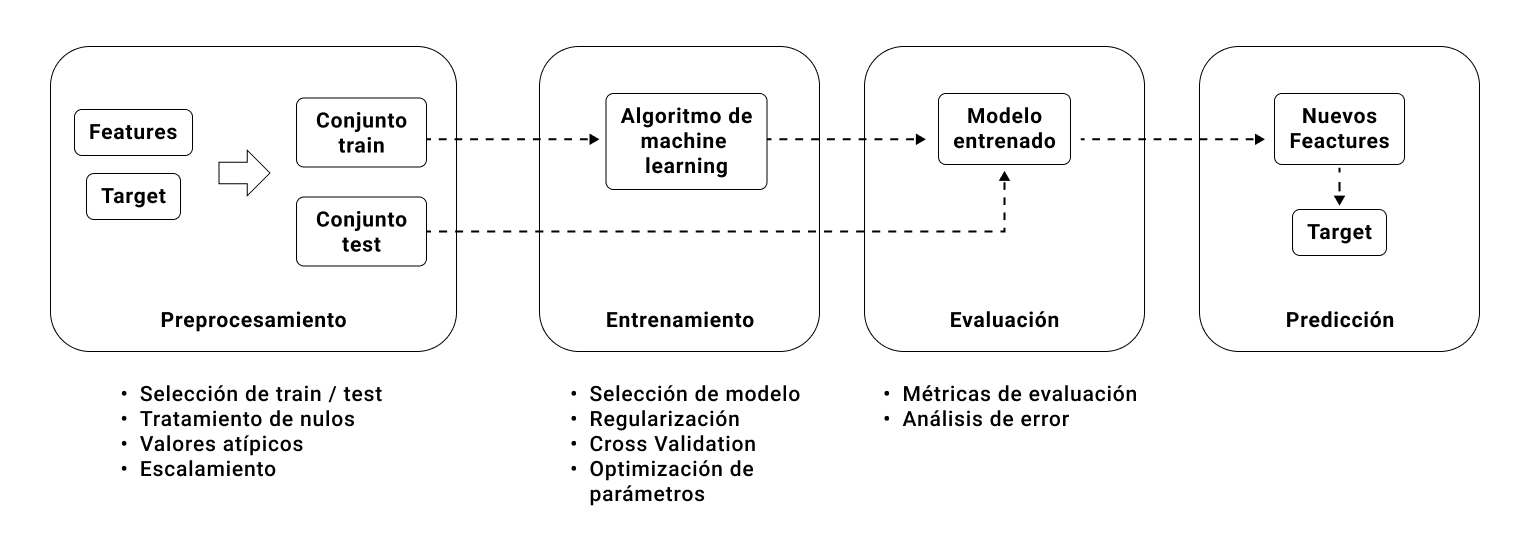

## Preprocesamiento
Esta etapa le preceden:
* *Conocimiento del negocio:* Principalmente es saber tener en claro el Objetivo del proyecto.
* *Conocimiento de la data:* Saber de dónde extraerá la data, cuál es su volumen, determinar la calidad de la data

### Importar librerías y cargar dataset

In [81]:
import pandas as pd #Usado para la manipulación de dataframes
import numpy as np #Realizar operaciones matemáticas
import matplotlib.pyplot as plt #Realizar gráficas

In [82]:
df = pd.read_csv('data/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [83]:
print('Filas: {}\ncolumnas: {}'.format(df.shape[0],df.shape[1]))

Filas: 614
columnas: 13


### Conocimiento del negocio
Loan prediction o predicción de préstamos, qué es? qué buscamos? qué variables son necesarias?



In [84]:
#Enlistaremos nuestras variables para poder manipularalas más facilmente
list(zip([i for i in range(df.shape[0])],df.columns))

[(0, 'Loan_ID'),
 (1, 'Gender'),
 (2, 'Married'),
 (3, 'Dependents'),
 (4, 'Education'),
 (5, 'Self_Employed'),
 (6, 'ApplicantIncome'),
 (7, 'CoapplicantIncome'),
 (8, 'LoanAmount'),
 (9, 'Loan_Amount_Term'),
 (10, 'Credit_History'),
 (11, 'Property_Area'),
 (12, 'Loan_Status')]

In [85]:
df.rename(columns = {'Gender':'Genero',
                    'Married': 'Casado',
                    'Eduaction': 'Educacion',
                    'Property_Area': 'Propiedad',
                    'Loan_Status': 'Target'}, inplace = True)
df

,Loan_ID,Genero,Casado,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Propiedad,Target
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Generaremos una lista de vairables únicamente strings ``Objects``

In [86]:
[x for x in df.select_dtypes(include = ['object']).columns]

['Loan_ID',
 'Genero',
 'Casado',
 'Dependents',
 'Education',
 'Self_Employed',
 'Propiedad',
 'Target']

Generaremos una lista de vairables únicamente decimales ``float``

In [87]:
[x for x in df.select_dtypes(include = [np.number]).columns]

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

### Análisis exploratorio de datos

#### Datos Faltantes

In [88]:
df.isnull().sum()

Loan_ID               0
Genero               13
Casado                3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Propiedad             0
Target                0
dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Genero             601 non-null    object 
 2   Casado             611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Propiedad          614 non-null    object 
 12  Target             614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [90]:
def valores_nulos(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [91]:
valores_nulos(df)

Your selected dataframe has 13 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Genero,13,2.1
Casado,3,0.5


#### Deteccón de outliers

In [92]:
def porcentaje_outlier(data, columna):
    rango_intercuartil = data[columna].quantile(.75)- data[columna].quantile(.25)
    limite_superior = data[columna].quantile(.75) + 1.5*rango_intercuartil
    limite_inferior = data[columna].quantile(.25) - 1.5*rango_intercuartil
    #print('Rango superior: ',limite_superior)
    #print('Rango inferior: ',limite_inferior)
    outliers_count = data[(data[columna]>limite_superior)|(data[columna]<limite_inferior)].shape[0]
    print('Porcentaje de outliers en',columna,': ',np.round(outliers_count*100/data.shape[0],2),'%')
    #return limite_superior,limite_inferior, np.round(outliers_count*100/data.shape[0],2)

In [93]:
porcentaje_outlier(df,'ApplicantIncome')

Porcentaje de outliers en ApplicantIncome :  8.14 %


#### Transformaciones